# Sklearn

In [1]:
from sklearn.linear_model import LinearRegression 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

## Load Data

In [2]:
# to have access to my drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml101/sklearn/1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Inputs & Outputs

In [4]:
x = df['SAT']
print(type(x))
print(x.shape)

<class 'pandas.core.series.Series'>
(84,)


In [5]:
y = df['GPA']
print(y.shape)

(84,)


In [6]:
# Change the shape to fit with sklearn
input = x.values.reshape(-1,1)
input.shape #2D Object

(84, 1)

In [7]:
output = y.values.reshape(-1,1)
output.shape 

(84, 1)

## Regression

In [8]:
model = LinearRegression()
model.fit(input,output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Summary Data

### $R^2$


In [9]:
model.score(input,output)

0.40600391479679754

### Coefficients


In [10]:
model.coef_

array([[0.00165569]])

### Intercept

In [11]:
model.intercept_

array([0.2750403])

### Making Predictions

In [12]:
new_data = pd.DataFrame(data = [1244,1313],columns=['SAT'])
new_data

,SAT
0,1244
1,1313


In [13]:
new_input = new_data['SAT']
new_input = new_input.values.reshape(-1,1)
new_input.shape

(2, 1)

In [14]:
model.predict(new_input)

array([[2.33471623],
       [2.44895871]])

In [16]:
new_data['Predicted GPA'] = model.predict(new_input)
new_data

,SAT,Predicted GPA
0,1244,2.334716
1,1313,2.448959


### Plot the line


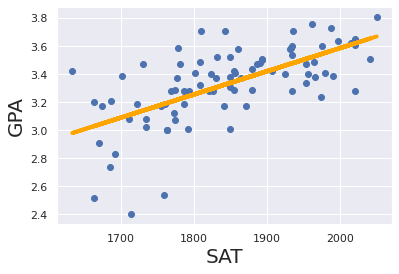

In [18]:
plt.scatter(x,y)
yhat = model.coef_ * input + model.intercept_
fig = plt.plot(x,yhat,lw=4,c = 'orange',label = 'regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()